#### Step 1: Reading and Understanding the Data

In [1]:
# remove Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file

Bike = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

Bike.shape

(730, 16)

In [6]:
# describing the columns of dataframe

Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# get the info about columns

Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Check the head of the dataset

Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

Bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
# mapping the season column

Bike.season = Bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
# mapping the month column

Bike.mnth = Bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
# mapping the weekday column

Bike.weekday = Bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
# mapping the weathersit column

Bike.weathersit = Bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [14]:
# check the head of the dataset

Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# check the column info of the dataset

Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Step 2: Visualising the Data

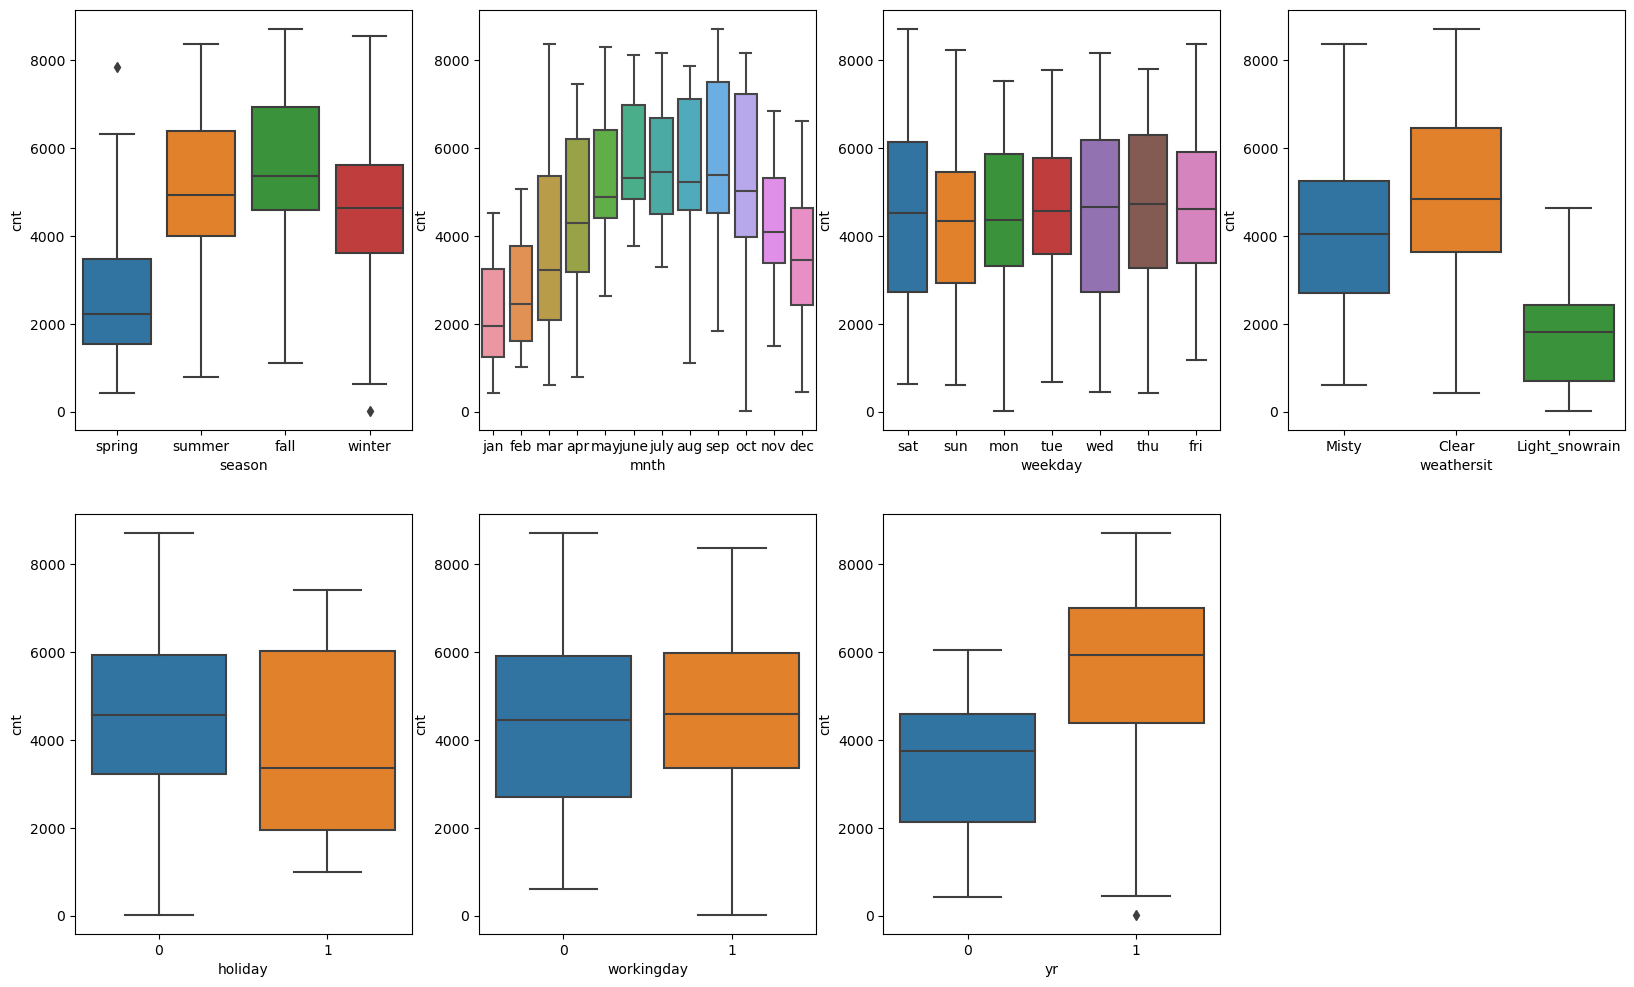

In [16]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike)
plt.show()

In [17]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=Bike)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=Bike, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

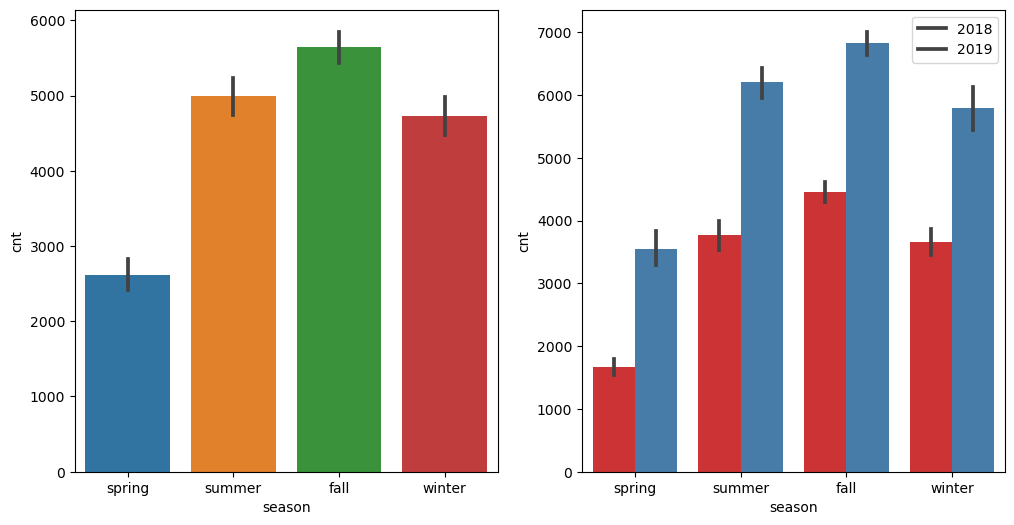

In [18]:
# plotting visualization for season column

plot_cat_columns('season')

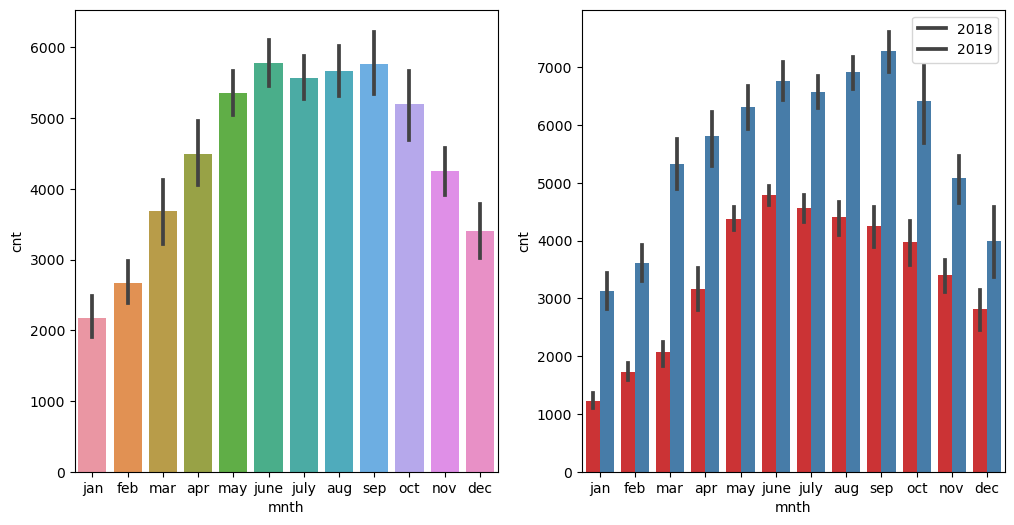

In [19]:
# plotting visualization for month column

plot_cat_columns('mnth')

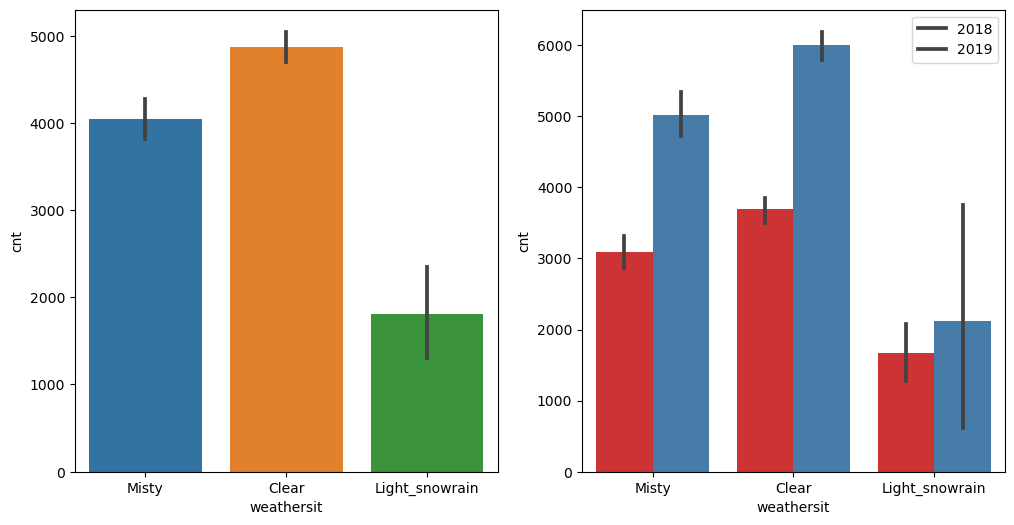

In [20]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

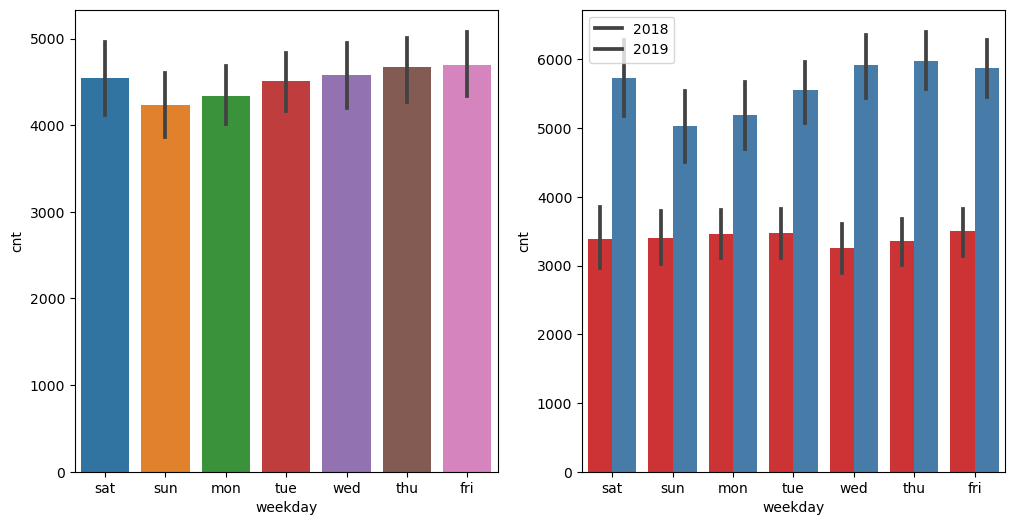

In [21]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

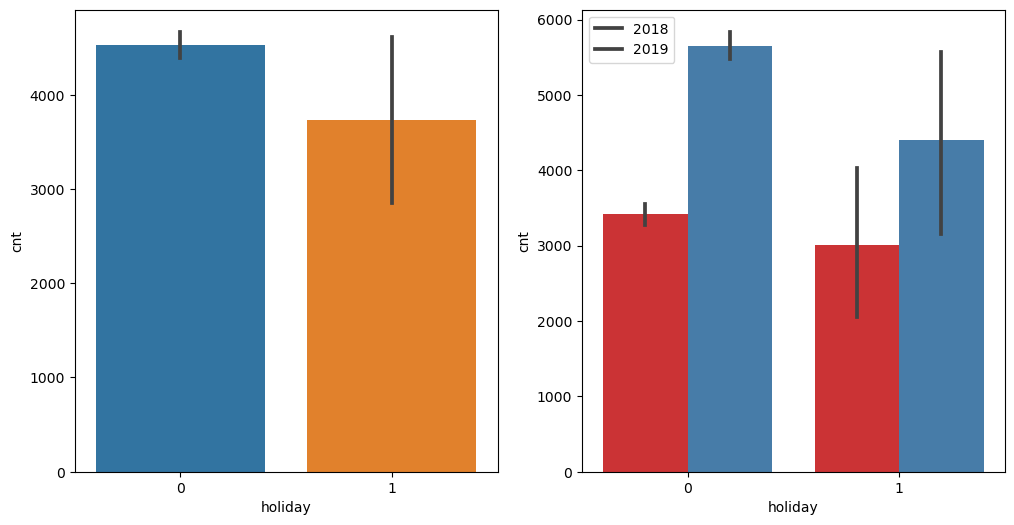

In [22]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

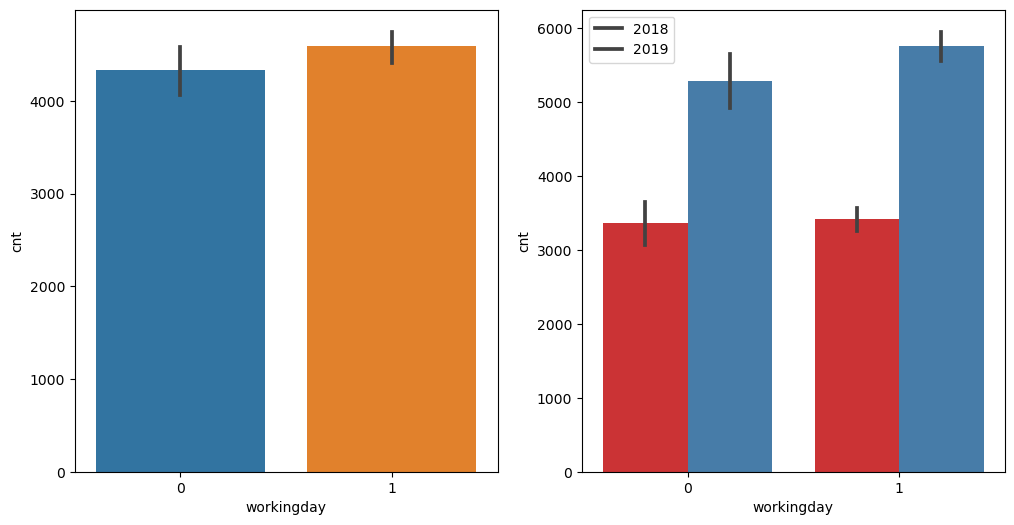

In [23]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

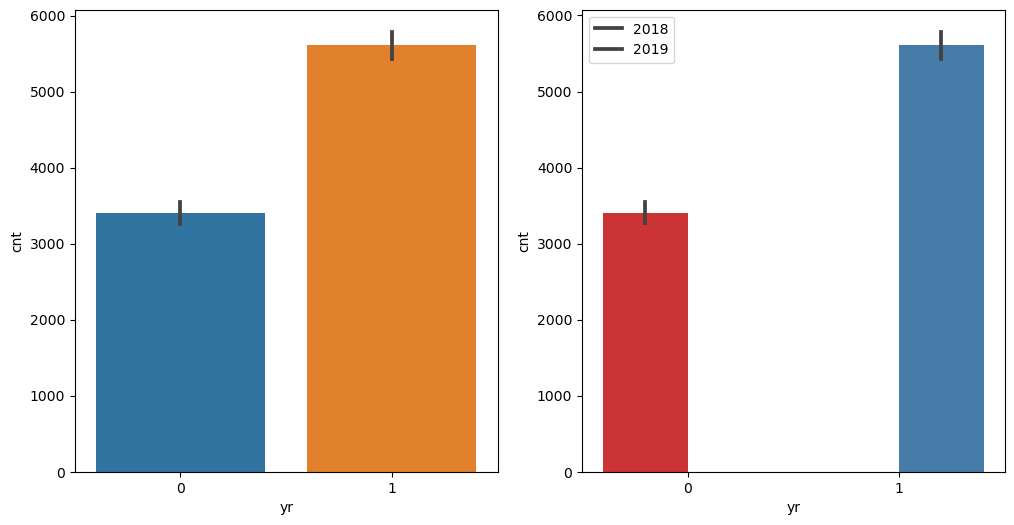

In [24]:
# plotting visualization for year column

plot_cat_columns('yr')

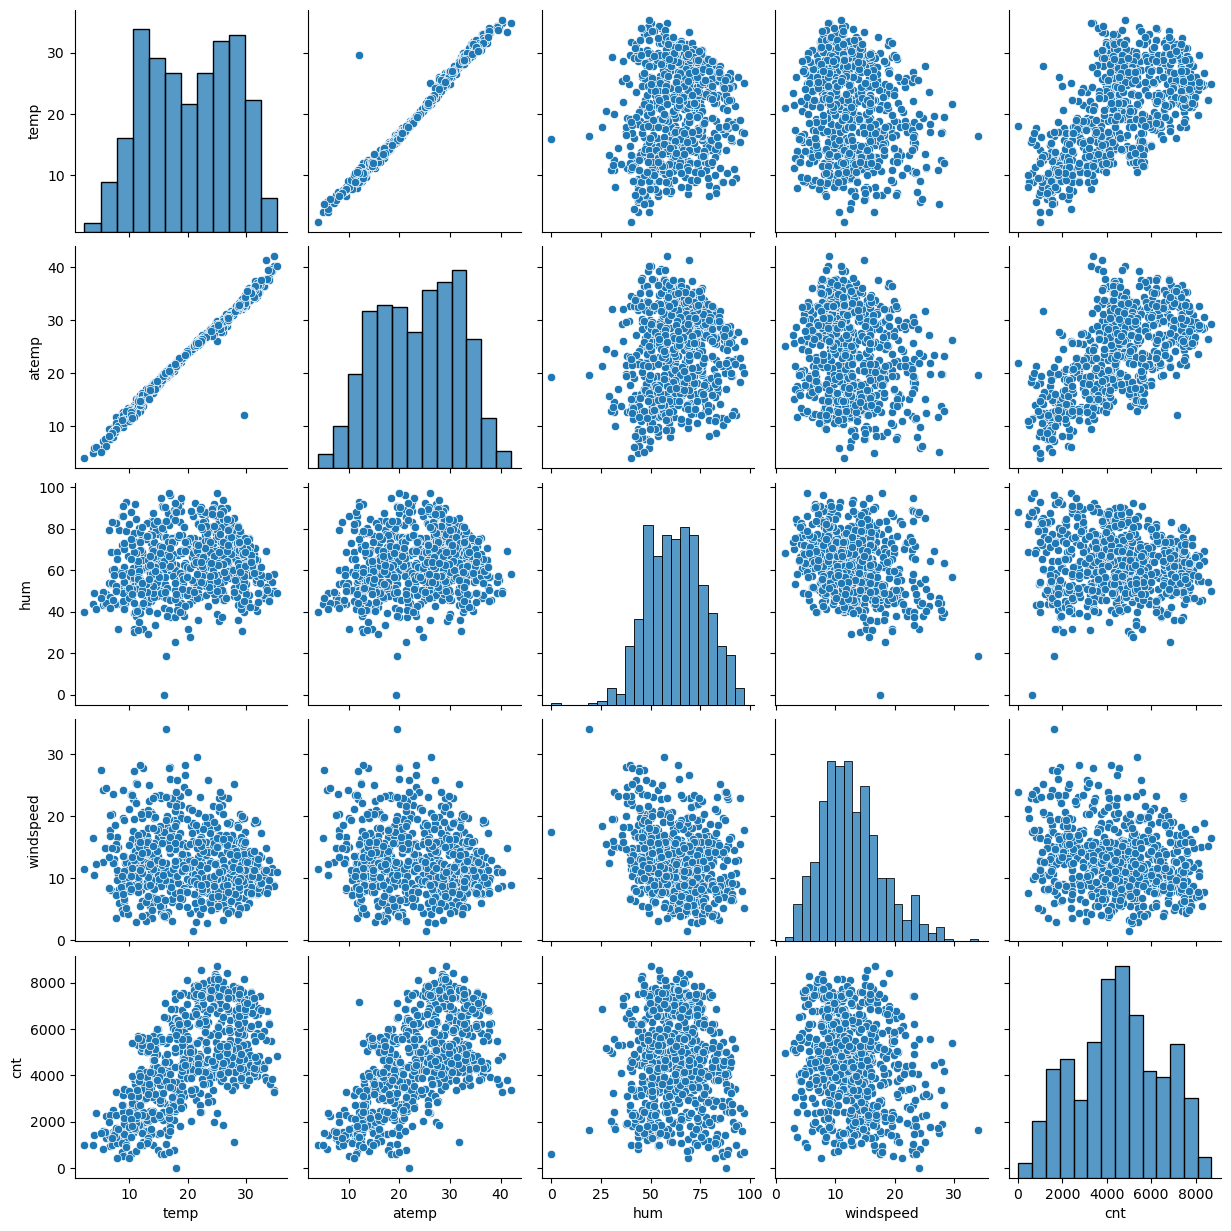

In [25]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=Bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### Step 3: Data Preparation

In [26]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(Bike.mnth,drop_first=True)
weekdays_df=pd.get_dummies(Bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(Bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(Bike.season,drop_first=True)

In [27]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
# Merging  the dataframe, with the dummy variable dataset. 

Bike_updatted = pd.concat([Bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [29]:
Bike_updatted.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [30]:
Bike_updatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [31]:
# dropping unnecessary columns as we have already created dummy variable out of it.

Bike_updatted.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [32]:
# check the head of new dataframe

Bike_updatted.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [33]:
# check the shape of new dataframe

Bike_updatted.shape

(730, 30)

In [34]:
# check the column info of new dataframe 

Bike_updatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

#### Step 4: Splitting the Data into Training and Testing Sets

In [35]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(Bike_updatted, train_size = 0.7, random_state = 100)

In [36]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [37]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [38]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [39]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


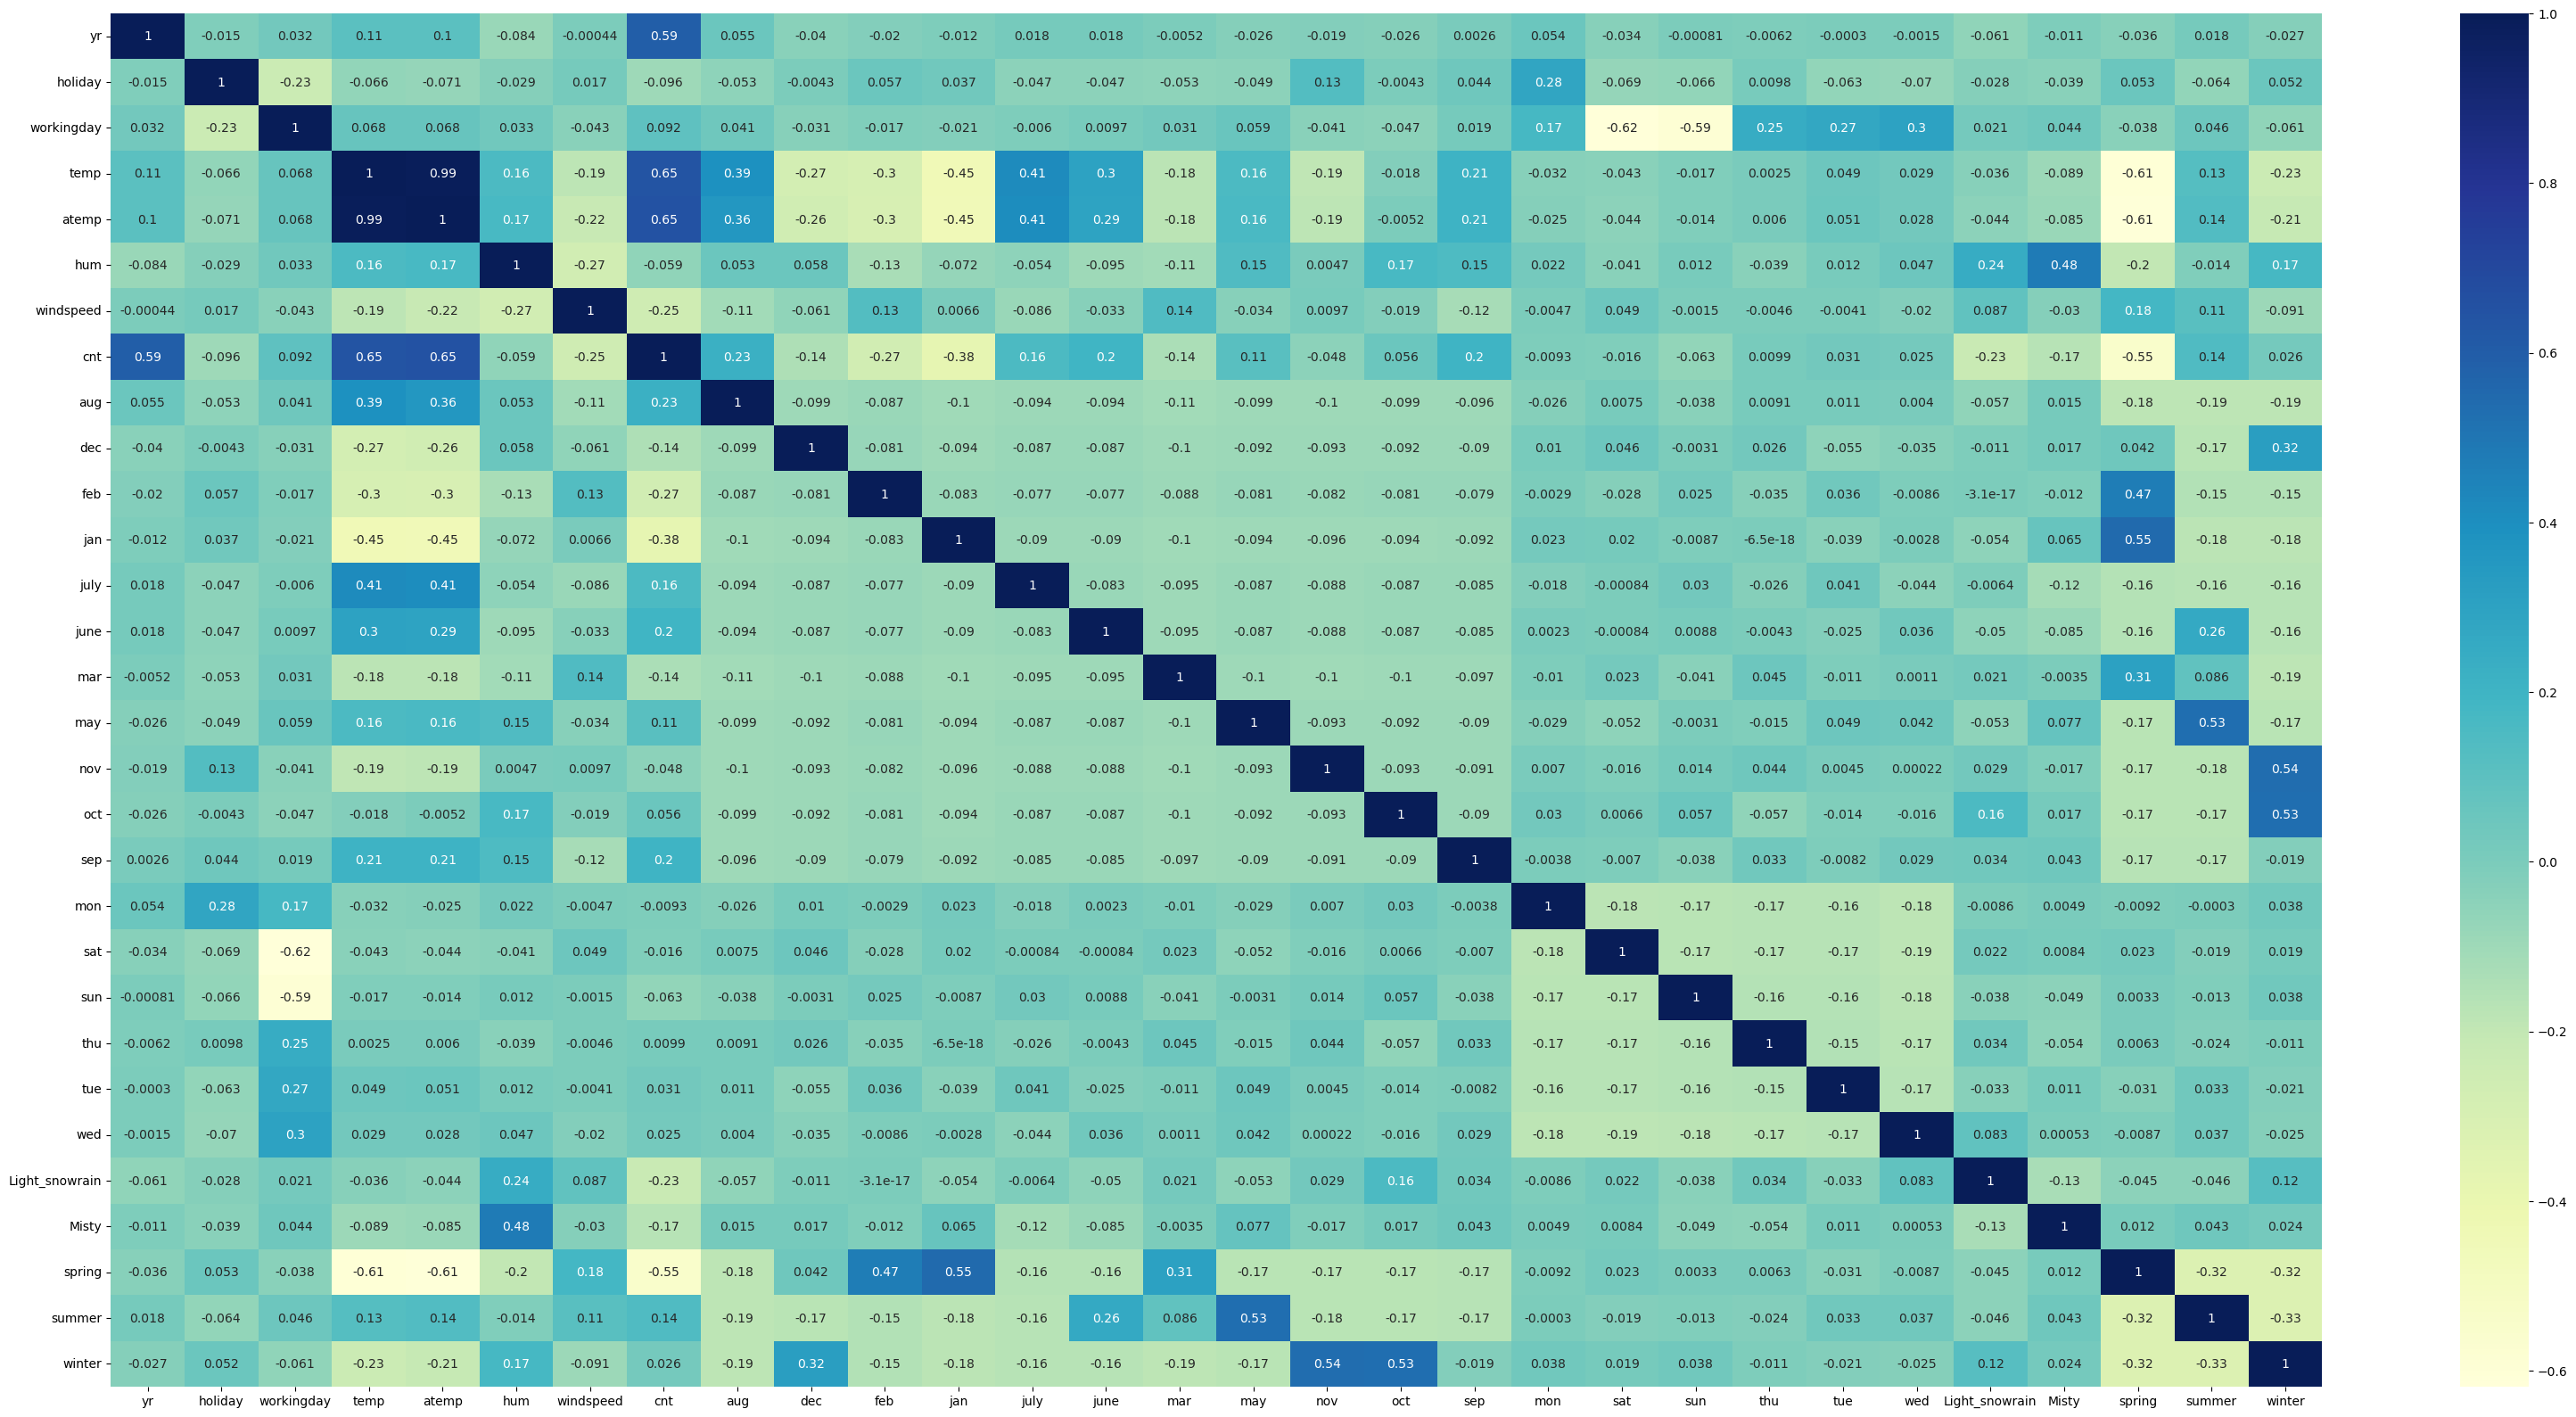

In [43]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

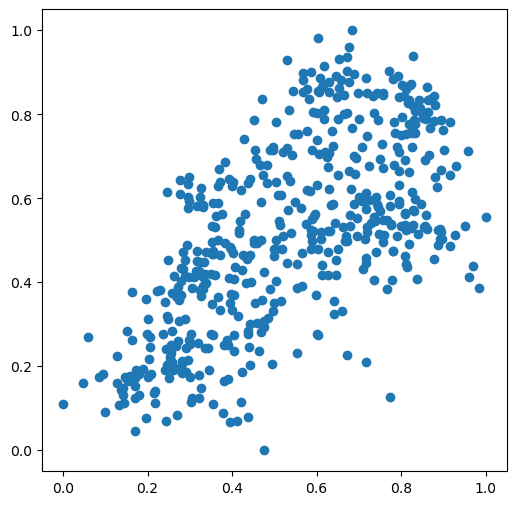

In [44]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [45]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
# Recursive feature elimination (Keep 60% of the variable)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [47]:
#List of variables selected in top 18 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 5),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 12),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [48]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')


In [49]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'thu', 'tue',
       'wed'],
      dtype='object')

In [50]:
# Generic function to calculate VIF of variables

def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [51]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [52]:
# calculate VIF

VIF(X_train_rfe)

,Features,VIF
2,workingday,56.18
11,sat,13.49
12,sun,12.86
15,spring,5.27
3,temp,4.43
17,winter,3.83
1,holiday,3.20
16,summer,2.77
4,hum,1.94
9,nov,1.77


#### Step 5: Building a linear model

In [53]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          2.52e-190
Time:                        17:23:02   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2299      0.029      7.

In [54]:
# As working day has high VIF value
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
14,spring,5.06
10,sat,5.03
4,windspeed,4.99
11,sun,4.83
16,winter,4.40
15,summer,3.09
13,Misty,2.35


In [55]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          2.52e-190
Time:                        17:23:28   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2235      0.044      5.

In [56]:
# We can drop sunday variable as it has high p value
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
13,spring,4.50
15,winter,4.11
14,summer,2.88
12,Misty,2.32
0,yr,2.09
10,sat,1.86


In [57]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.20e-190
Time:                        17:23:46   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2690      0.037      7.

In [58]:
# We can drop humidity variable as it had high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
12,spring,3.09
14,winter,3.03
13,summer,2.33
0,yr,2.08
9,sat,1.86
7,nov,1.79
5,jan,1.67


In [59]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.84e-188
Time:                        17:24:18   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1985      0.033      6.

In [60]:
# We can drop temp variable as it has high VIF but i tried to drop it R and R2 drop drastically  so now we drop workingday
X_train_new = X_train_new.drop(['summer'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.56
3,windspeed,4.17
13,winter,2.58
12,spring,2.45
0,yr,2.07
9,sat,1.82
7,nov,1.79
5,jan,1.67
11,Misty,1.56


In [61]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.88e-188
Time:                        17:24:51   Log-Likelihood:                 510.58
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     495   BIC:                            -927.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2442      0.026      9.

In [62]:
# We can drop temp variable as it has high VIF but i tried to drop it R and R2 drop drastically  so now we drop workingday
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
1,temp,4.70
2,windspeed,4.08
12,winter,2.56
11,spring,2.35
0,yr,2.06
6,nov,1.79
4,jan,1.65
10,Misty,1.53
3,dec,1.47
5,july,1.36


In [63]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          2.08e-184
Time:                        17:25:52   Log-Likelihood:                 498.20
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     496   BIC:                            -909.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2869      0.026     11.

In [64]:
# We can drop temp variable as it has high VIF but i tried to drop it R and R2 drop drastically  so now we drop workingday
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
1,temp,4.66
2,windspeed,4.05
11,winter,2.55
10,spring,2.35
0,yr,2.06
6,nov,1.79
4,jan,1.65
9,Misty,1.53
3,dec,1.46
5,july,1.36


In [65]:
# Building 7th linear regression model

X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Tue, 04 Jul 2023   Prob (F-statistic):          1.08e-184
Time:                        17:27:01   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     497   BIC:                            -911.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2901      0.026     11.

In [66]:
# Checking the parameters and their coefficient values
lr_7.params

const             0.290080
yr                0.235420
temp              0.399988
windspeed        -0.154994
dec              -0.050640
jan              -0.056881
july             -0.063476
nov              -0.054751
sep               0.049507
Light_snowrain   -0.290648
Misty            -0.078344
spring           -0.107626
winter            0.061798
dtype: float64

#### Step 6: Residual Analysis of the train data and validation

In [67]:
X_train_lm_7

,const,yr,temp,windspeed,dec,jan,july,nov,sep,Light_snowrain,Misty,spring,winter
576,1.0,1,0.815169,0.264686,0,0,1,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,0,0,1,1,0
728,1.0,1,0.245101,0.663106,1,0,0,0,0,0,0,1,0
482,1.0,1,0.395666,0.188475,0,0,0,0,0,0,1,0,0
111,1.0,0,0.345824,0.380981,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,0,0,0,0,0,0,0,1,0
350,1.0,0,0.248216,0.431816,1,0,0,0,0,0,1,0,1
79,1.0,0,0.462664,0.529881,0,0,0,0,0,0,1,0,0


In [68]:
y_train_pred = lr_7.predict(X_train_lm_7)

Text(0.5, 0, 'Errors')

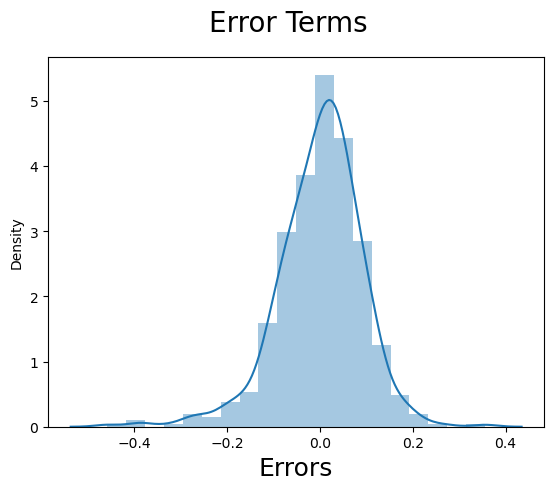

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [70]:
VIF(X_train_new)

,Features,VIF
1,temp,4.66
2,windspeed,4.05
11,winter,2.55
10,spring,2.35
0,yr,2.06
6,nov,1.79
4,jan,1.65
9,Misty,1.53
3,dec,1.46
5,july,1.36


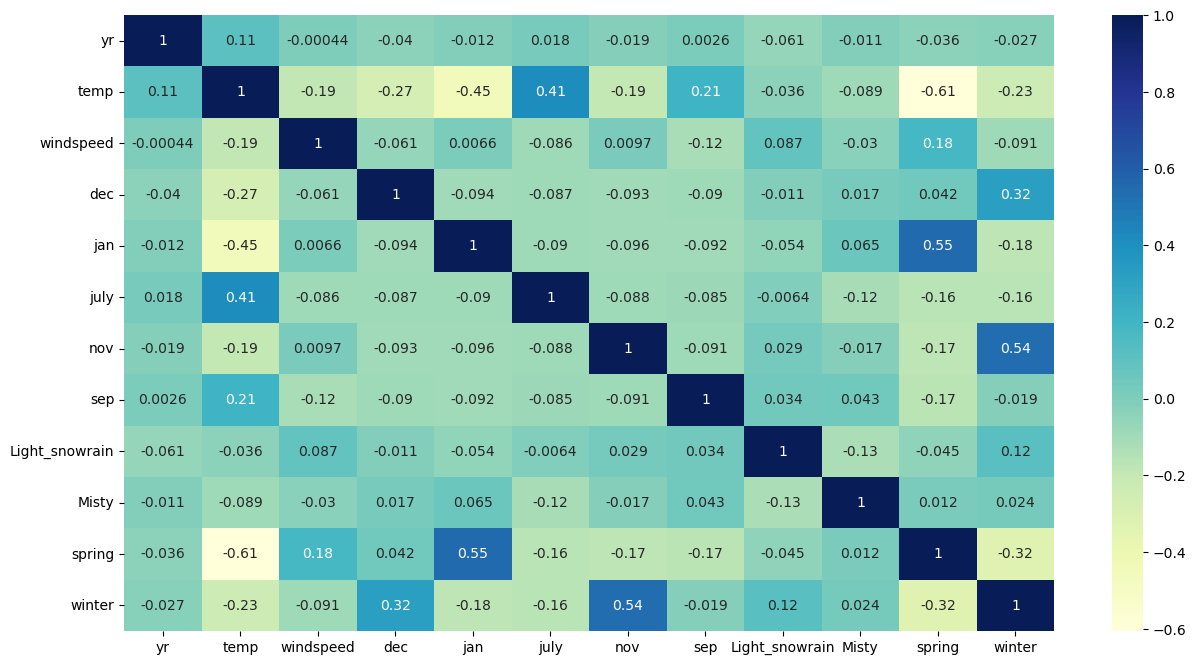

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

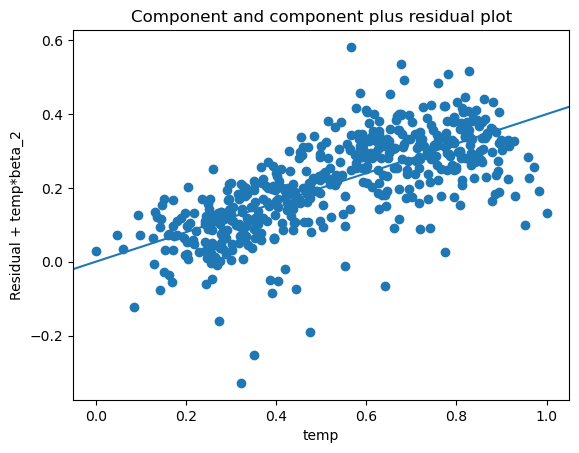

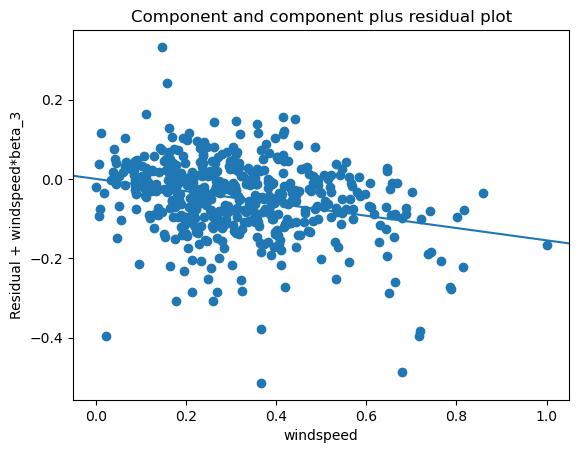

In [72]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_7, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_7, 'windspeed')
plt.show()

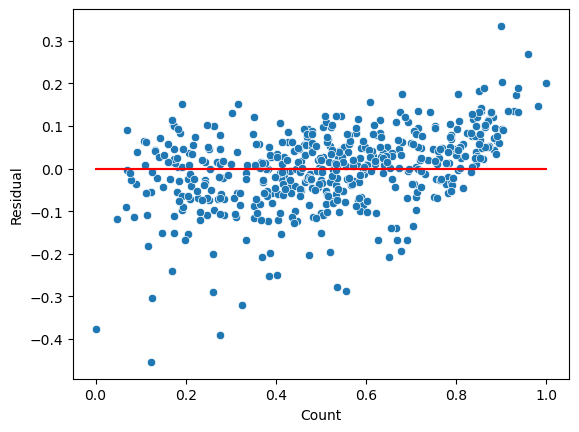

In [73]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Step 7: Making Predictions Using the Final Model


In [74]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [75]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)

In [78]:
y_pred = lr_7.predict(X_test_lm_7)

In [79]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8169

#### Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

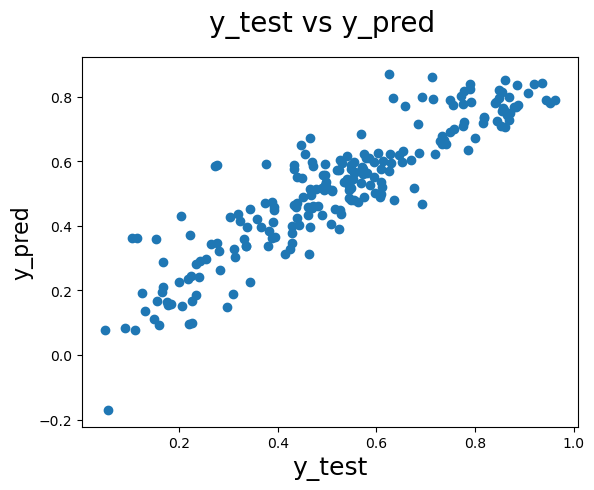

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [81]:
lr_7.params

const             0.290080
yr                0.235420
temp              0.399988
windspeed        -0.154994
dec              -0.050640
jan              -0.056881
july             -0.063476
nov              -0.054751
sep               0.049507
Light_snowrain   -0.290648
Misty            -0.078344
spring           -0.107626
winter            0.061798
dtype: float64

In [82]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8062


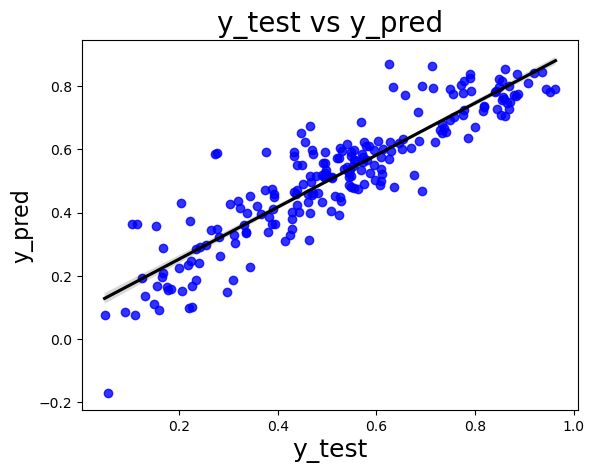

In [86]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.834
    - Test dataset R^2           : 0.8169
    - Train dataset Adjusted R^2 : 0.830   
    - Test dataset Adjusted R^2  : 0.8062

